# Bumble Exploratory Data Analysis Report

## Introduction:

Bumble a popular dating platform seeking to enhance user engagement, optimize matchmaking algorithms, and personalize platform features, ultimately improving user satisfaction and platform growth. It collects user information through profiles, which include details about demographics, lifestyle habits, and personal preferences. Our task is to conduct a detailed exploratory analysis of Bumble dataset to answer key business and user behavior questions.

In [1371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv("bumble.csv")

## Part 1: Data Cleaning
### 1. Inspecting Missing Data

Missing data is a common issue in real-world datasets. On a platform like Bumble, missing user information might reflect gaps in the user profile setup process, incomplete data collection, or users intentionally leaving certain fields blank. As a data analyst, your role is to assess the extent of missing data, understand its potential impact, and decide the most appropriate methods to address it.

#### Questions 1.1: Which columns in the dataset have missing values, and what percentage of data is missing in each column?

In [39]:
#finding columns with missing values
missing_value_columns = data.isnull().sum()
print("Missing Value Columns:\n", missing_value_columns)

Missing Value Columns:
 age                0
status             0
gender             0
body_type       5296
diet           24395
drinks          2985
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
pets           19921
religion       20226
sign           11056
speaks            50
dtype: int64


##### Key Findings: Columns - body_type, diet, drinks, education, ethnicity, height, job, pets, religion, sign, speak have missing values.

In [25]:
# Calculating the percentage of missing values for each column
missing_value_percentage = data.isnull().mean()*100
missing_value_percentage = missing_value_percentage.round(2)
print("Missing value percentage:\n", missing_value_percentage)

Missing value percentage:
 age             0.00
status          0.00
gender          0.00
body_type       8.83
diet           40.69
drinks          4.98
education      11.06
ethnicity       9.48
height          0.01
income          0.00
job            13.68
last_online     0.00
location        0.00
pets           33.23
religion       33.74
sign           18.44
speaks          0.08
dtype: float64


##### Key Findings: Columns - diet(40.69%), pets(33.23%), religion(33.74%), sign(18.44%) have maximum missing values.

#### Question 1.2: Are there columns where more than 50% of the data is missing? Drop those columns where missing values are >50%.

##### Key Findings: There are no columns with more than 50% percent missing data, hence no need to drop any column.

#### Question 1.3: Missing numerical data (e.g., height, income) should be handled by imputing the median value of height and income for the corresponding category, such as gender, age group, or location. This ensures that the imputed values are contextually relevant and reduce potential biases in the analysis.

In [632]:
# Imputing missing 'height' with the median value grouped by 'gender'
data['height'] = data.groupby('gender')['height'].transform(lambda grp: grp.fillna(grp.median()))
# Verifying if missing values in 'height' have been imputed
missing_value_count_after_imputation = data['height'].isna().sum()
print("Missing value count in 'height' after imputation:",missing_value_count_after_imputation)

Missing value count in 'height' after imputation: 0


##### Key Findings: height column has 3 missing values, that are imputed by median value.

### 2. Data Types :

Accurate data types are critical for meaningful analysis and visualization. For example, numeric fields like income or height must be stored as numbers for statistical computations, while dates like last_online must be converted to datetime format for time-based calculations.

#### Question 2.1: Are there any inconsistencies in the data types across columns (e.g., numerical data stored as strings)?

In [56]:
# Checking inconsistency in data type across columns
data.dtypes

age              int64
status          object
gender          object
body_type       object
diet            object
drinks          object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
pets            object
religion        object
sign            object
speaks          object
dtype: object

##### Key Findings: No column with numeric data have data type inconsistency. 'age', 'height', 'income' columns are already numeric. There is data type inconsistency in 'last_online' column which is an 'object' data type whereas it should be in datetime format.

#### Question 2.2: Which columns require conversion to numerical data types for proper analysis (e.g., income)?

##### Key Findings: Since no numeric value column is stored as string hence it is not required to convert them into numeric data type.

#### Question 2.3: Does the last_online column need to be converted into a datetime format? What additional insights can be gained by analyzing this as a date field?

In [84]:
# Converting last_online column datatype to datetime
data['last_online'] = pd.to_datetime(data['last_online'], format = '%Y-%m-%d-%H-%M')

# Verifying if the data type on 'last_online' is changed
data['last_online'].dtype

datetime64[ns, UTC]

##### Key Findings: The last_online column was stored as string, that is conereted into datetime format.

### 3. Outliers

Outliers are extreme values in the dataset that can distort averages, correlations, and overall trends. In the context of Bumble, an outlier in age (e.g., 110 years old) or income (e.g., $1,000,000 or -1) could represent errors or rare, valid cases.

#### Question 3.1: Are there any apparent outliers in numerical columns such as age, height, or income? What are the ranges of values in these columns?

In [92]:
# defining function to find outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.10)
    Q3 = data[column].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Looping through the numerical columns using above defined function
for col in ['age', 'height', 'income']:
    outliers, lb, ub = detect_outliers_iqr(data, col)
    min_value = data[col].min()
    max_value = data[col].max()
    print(f"{col} range: {min_value} to {max_value}")
    print(f"Outliers in '{col}':")
    print(outliers[col].values)
    print(f"Lower Bound: {lb}, Upper Bound: {ub}\n")

age range: 18 to 110
Outliers in 'age':
[110 109]
Lower Bound: -11.5, Upper Bound: 80.5

height range: 1.0 to 95.0
Outliers in 'height':
[91. 95. 95. 36. 43. 95. 93.  8. 36. 95. 36.  3. 36. 42. 95. 36. 94.  6.
 95. 47. 91. 36. 36. 95. 95. 95. 95. 94. 90. 37.  9. 95. 95. 95. 37. 91.
 36.  1. 43. 92. 36. 26. 95. 95. 95. 95. 89. 95. 36.  4. 95. 36. 95. 94.]
Lower Bound: 48.0, Upper Bound: 88.0

income range: -1 to 1000000
Outliers in 'income':
[1000000  150000 1000000 ... 1000000  150000 1000000]
Lower Bound: -75002.5, Upper Bound: 125001.5



##### Key Findings: There are outliers in sge, height, and income column.

#### Question 3.2: Any -1 values in numerical columns like income should be replaced with 0, as they may represent missing or invalid data.

In [1309]:
# Replacing -1 values in 'income' with 0
data['income'] = data['income'].replace(-1, 0)
print("Replaced -1 in income with 0.")

#verifying if valuess are replaced
data['income']

Replaced -1 in income with 0.


0             0
1         80000
2             0
3         20000
4             0
          ...  
59941         0
59942         0
59943    100000
59944         0
59945         0
Name: income, Length: 59946, dtype: int64

##### Key Findings: The income column has so many values as -1, these are replaced by 0 for better analysis.

#### Question 3.3: For other outliers, rather than deleting them, calculate the mean and median values using only the middle 80% of the data (removing extreme high and low values). This approach ensures that outliers do not disproportionately impact the analysis while retaining as much meaningful data as possible.

In [100]:
# defining function to calculate mean and median for 80% data
def calculate_trimmed_stats(data, column):
    lower_bound = data[column].quantile(0.10)
    upper_bound = data[column].quantile(0.90)
    trimmed_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    mean = trimmed_data[column].mean().round(2)
    median = trimmed_data[column].median()
    return mean, median, lower_bound, upper_bound

# using defined function for 'age' and 'height' column
columns = ['age', 'height']
trimmed_stats = {}
for col in columns:
    if col in data.columns:
        mean, median, lb, ub = calculate_trimmed_stats(data, col)
        trimmed_stats[col] = {'mean': mean, 'median': median}
        print(f"For '{col}':")
        print(f"Mean: {mean}, Median: {median}")
        print(f"lower bound: {lb}, upper bound: {ub}\n")

For 'age':
Mean: 31.09, Median: 30.0
lower bound: 23.0, upper bound: 46.0

For 'height':
Mean: 68.23, Median: 68.0
lower bound: 63.0, upper bound: 73.0



### 4. Missing Data Visualization:

Visualizing missing data helps identify patterns of incompleteness in the dataset, which can guide data cleaning strategies. Understanding which columns have high levels of missing data ensures decisions about imputation or removal are well-informed.


#### Questions 4.1: Create a heatmap to visualize missing values across the dataset. Which columns show consistent missing data patterns?

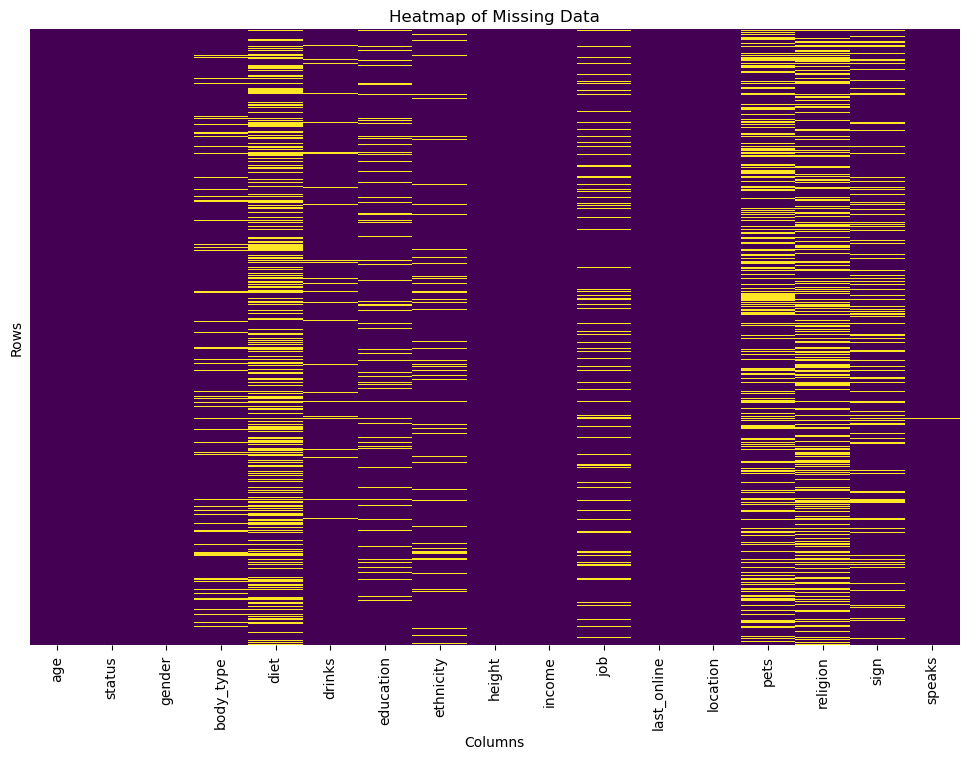

In [1236]:
# Checking for missing values
missing_data = data.isna()

# Plotting a heatmap to visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

##### Key Findings: Columns - diet, pets, religion and sign show maximum missing values.

## Part 2: Data Processing

### 1. Binning and Grouping

Grouping continuous variables, such as age or income, into bins helps simplify analysis and identify trends among specific groups. For instance, grouping users into age ranges can reveal distinct patterns in behavior or preferences across demographics.

#### Questions 1.1: Bin the age column into categories such as "18-25", "26-35", "36-45", and "46+" to create a new column, age_group. How does the distribution of users vary across these age ranges?

In [1336]:
# Defining age bins and labels and Creating a new column 'age_group'
bins = [18, 25, 35, 45, float('inf')]
labels = ["18-25", "26-35", "36-45", "46+"]
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# Analyzing the distribution of users across age groups
age_group_distribution = data['age_group'].value_counts().sort_index()
print("Distribution of users across age ranges:", age_group_distribution)

Distribution of users across age ranges: age_group
18-25    14145
26-35    28621
36-45    10803
46+       6068
Name: count, dtype: int64


##### Key Findings: Age group 26-35 have maximum number of users followed by age group 18-25.

#### Question 1.2: Group income into categories like "Low Income," "Medium Income," and "High Income" based on meaningful thresholds (e.g., quartiles). What insights can be derived from these groups?Group income into categories like "Low Income," "Medium Income," and "High Income" based on meaningful thresholds (e.g., quartiles). What insights can be derived from these groups?

In [665]:
# calculating thresholds based on quartiles
low_threshold = data['income'].quantile(0.10)
medium_threshold = data['income'].quantile(0.90)

# defining function to categorize income nad applying the function on 'income' column
def categorize_income(income):
    if income <= low_threshold:
        return "Low Income"
    elif income <= medium_threshold:
        return "Medium Income"
    else:
        return "High Income"
data['income_group'] = data['income'].apply(categorize_income)

# Analyzing the distribution of income groups
income_group_distribution = data['income_group'].value_counts()
print("Income Group Distribution:", income_group_distribution)

Income Group Distribution: income_group
Low Income       48442
Medium Income     5980
High Income       5524
Name: count, dtype: int64


##### Key Findings: Maximum number of users have low income. High income users are very less.

### 2. Derived Features

Derived features are new columns created based on the existing data to add depth to the analysis. These features often reveal hidden patterns or provide new dimensions to explore.

#### Questions 2.1: Create a new feature, profile_completeness, by calculating the percentage of non-missing values for each user profile. How complete are most user profiles, and how does completeness vary across demographics?

In [636]:
# Creating a new feature: 'percentage of non-missing values' for each user and analyzing the distribution of profile completeness
data['profile_completeness'] = data.notnull().sum(axis=1) / data.shape[1] * 100
print("Profile Completeness Percentage:\n", data['profile_completeness'].round(2).head())

# Grouping by gender to analyze variation in completeness
completeness_by_gender = data.groupby('gender')['profile_completeness'].mean().round(2)
print("\nAverage Profile Completeness by Gender:\n", completeness_by_gender)

Profile Completeness Percentage:
 0    100.0
1    100.0
2     85.0
3     95.0
4     90.0
Name: profile_completeness, dtype: float64

Average Profile Completeness by Gender:
 gender
f    91.45
m    91.14
Name: profile_completeness, dtype: float64


##### Key Findings: Female have more profile completeness than males.

### 3. Unit Conversion

Standardizing units across datasets is essential for consistency, especially when working with numerical data. In the context of the Bumble dataset, users’ heights are given in inches, which may not be intuitive for all audiences.

#### Questions 3.1: Convert the height column from inches to centimeters using the conversion factor (1 inch = 2.54 cm). Store the converted values in a new column, height_cm.

In [597]:
# Creating a new column with height in centimeters ( formula: 1 inch = 2.54 cm)
conversion_factor = 2.54
data['height_cm'] = data['height'] * conversion_factor
# Verifying if new column added
data[['height', 'height_cm']].head()

,height,height_cm
0,75.0,190.50
1,70.0,177.80
2,68.0,172.72
3,71.0,180.34
4,66.0,167.64


##### Key Findings: The new column of height_cm is added to simplify analysis

## Part 3: Data Analysis

### 1. Demographic Analysis

Understanding the demographics of users is essential for tailoring marketing strategies, improving user experience, and designing features that resonate with the platform’s audience. Insights into gender distribution, orientation, and relationship status can help Bumble refine its matchmaking algorithms and engagement campaigns.

#### Question 1.1: What is the gender distribution (gender) across the platform? Are there any significant imbalances?

In [314]:
# calculating gender distribution
gender_distribution = data['gender'].value_counts()
print("Gender Distribution:\n", gender_distribution)

# checking for significant imbalances
total_users = gender_distribution.sum()
imbalance = gender_distribution / total_users * 100
print("\nPercentage Distribution:\n", imbalance.round(2))


Gender Distribution:
 gender
m    35829
f    24117
Name: count, dtype: int64

Percentage Distribution:
 gender
m    59.77
f    40.23
Name: count, dtype: float64


##### Key Findings: The male(59.77%) users are more than the female(40.23%), hence they can be retained by providing long term budget subscriptions.

#### Question 1.2: What are the proportions of users in different status categories (e.g., single, married, seeing someone)? What does this suggest about the platform’s target audience?

In [329]:
# calculating status value counts
status_distribution = data['status'].value_counts()
print("Status Distribution:\n", status_distribution)

# Calculating proportions of different status categories
status_proportion = status_distribution / status_distribution.sum() * 100
print("\nStatus Proportions:\n", status_proportion.round(2))

Status Distribution:
 status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64

Status Proportions:
 status
single            92.91
seeing someone     3.44
available          3.11
married            0.52
unknown            0.02
Name: count, dtype: float64


##### Key Findings: Maximum share of users are single (92.91%), which is huge.

#### Question 1.3: How does status vary by gender? For example, what proportion of men and women identify as single?

In [338]:
# calculating status proportion by gender
status_proportion_by_gender = data.groupby('gender')['status'].value_counts(normalize=True) * 100
print("Status Proportions by Gender:\n", status_proportion_by_gender.round(2))

Status Proportions by Gender:
 gender  status        
f       single            92.54
        seeing someone     4.16
        available          2.72
        married            0.56
        unknown            0.02
m       single            93.16
        available          3.37
        seeing someone     2.96
        married            0.49
        unknown            0.02
Name: proportion, dtype: float64


##### Key Findings: Both men (93.16%) and women (92.54%) predominantly identify as single. This suggests that the platform is primarily catering to individuals looking for new connections. The proportions across statuses are fairly similar between men and women. This indicates a balanced representation and no significant gender-based imbalances in user intentions.

### 2. Correlation Analysis

Correlation analysis helps uncover relationships between variables, guiding feature engineering and hypothesis generation. For example, understanding how age correlates with income or word count in profiles can reveal behavioral trends that inform platform design.

#### Question 2.1: What are the correlations between numerical columns such as age, income, gender Are there any strong positive or negative relationships?

In [1396]:
# Calculating the correlation matrix using .corr() function
filtered_income = data[data['income'] > 0]
numerical_columns = ['age', 'income', 'height']
correlation_matrix = filtered_income[numerical_columns].corr().round(4)
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
            age  income  height
age     1.0000 -0.0092 -0.0117
income -0.0092  1.0000  0.0588
height -0.0117  0.0588  1.0000


##### Key Findings: There is positive correlation between income and height, i.e; user with higher income are taller. There is negative correlation between age and height, i.e; user with higher age has low height.

#### Question 2.2: How does age correlate with income? Are older users more likely to report higher income levels?

In [703]:
# Calculating the correlation between age and income using using corr() function
age_income_correlation = data['age'].corr(data['income'])
print("Correlation between Age and Income:\n", age_income_correlation)

Correlation between Age and Income:
 -0.0010038681910054018


##### Key Findings: There is negative correlation between age and income, i.e; user with higher age has low income.

### 3. Diet and Lifestyle Analysis

Lifestyle attributes such as diet, drinks provide insights into user habits and preferences. Analyzing these factors helps identify compatibility trends and inform product features like filters or match recommendations.

#### Question 3.1: How do dietary preferences (diet) distribute across the platform? For example, what percentage of users identify as vegetarian, vegan, or follow "anything" diets?

In [394]:
# Calculating the distribution of dietary preferences
diet_preference_distribution = data['diet'].value_counts(normalize = True)*100
print("Dietary Preferences Distribution:\n", diet_preference_distribution.round(2))

Dietary Preferences Distribution:
 diet
mostly anything        46.65
anything               17.39
strictly anything      14.38
mostly vegetarian       9.69
mostly other            2.83
strictly vegetarian     2.46
vegetarian              1.88
strictly other          1.27
mostly vegan            0.95
other                   0.93
strictly vegan          0.64
vegan                   0.38
mostly kosher           0.24
mostly halal            0.14
strictly halal          0.05
strictly kosher         0.05
halal                   0.03
kosher                  0.03
Name: proportion, dtype: float64


##### Key Findings: Maximum users have diet preference as mostly anything (46.65%). Other than that Vegetarian (1.88%), (Vegan (0.38%), and Anything (17.39%).

#### Question 3.2: How do drinking habits (drinks) vary across different diet categories? Are users with stricter diets (e.g., vegan) less likely to drink?

In [422]:
# calculating drink habit counts by diet using value_count() function
drinking_by_diet = data.groupby('diet')['drinks'].value_counts(normalize = True).unstack()*100
print("\nDrinking Habits by Diet (%):\n", drinking_by_diet.round(2).to_string(float_format="{:.2f}".format))


Drinking Habits by Diet (%):
 drinks               desperately  not at all  often  rarely  socially  very often
diet                                                                             
anything                    0.35        4.92   9.58    8.51     75.67        0.97
halal                        NaN       44.44  11.11     NaN     44.44         NaN
kosher                       NaN        9.09    NaN   18.18     63.64        9.09
mostly anything             0.41        5.19   8.54    9.47     75.61        0.79
mostly halal                6.98       23.26   4.65   18.60     37.21        9.30
mostly kosher               1.19        8.33   4.76   20.24     59.52        5.95
mostly other                0.82        9.33   5.03   18.05     66.26        0.51
mostly vegan                0.62       12.42   6.83   19.25     59.94        0.93
mostly vegetarian           0.57        5.87   7.02   14.03     71.91        0.60
other                       0.32       11.22   7.37   19.23     61.

##### Key Findings: Almost all diet preferences have maximum number of user drinks socially. Even the users with strict diet preferences have maximum users that drinks socially.

### 4. Geographical Insights

Analyzing geographical data helps Bumble understand its user base distribution, enabling targeted regional campaigns and feature localization. For instance, identifying the top cities with active users can guide marketing efforts in those areas.

#### Question 4.1: Extract city and state information from the location column. What are the top 5 cities and states with the highest number of users?

In [1303]:
# Spliting the 'location' column into 'city' and 'state' columns
location_split = data['location'].str.split(',', expand=True)
data['city'] = location_split[0].str.strip()
data['state'] = location_split[1].str.strip()

# Counting the top 5 cities with maximum number of users
top_cities = data['city'].value_counts().sort_values(ascending=False).head(5)
print("Top 5 Cities with the Highest Number of Users:\n", top_cities)

# Counting the top 5 states with maximum number of users
top_states = data['state'].value_counts().sort_values(ascending=False).head(5)
print("\nTop 5 States with the Highest Number of Users:\n", top_states)

Top 5 Cities with the Highest Number of Users:
 city
san francisco    31064
oakland           7214
berkeley          4212
san mateo         1331
palo alto         1064
Name: count, dtype: int64

Top 5 States with the Highest Number of Users:
 state
california       59855
new york            17
illinois             8
massachusetts        5
texas                4
Name: count, dtype: int64


##### Key Findings: Cities Like San francisco (31064), oakland (7214), berkeley (4212) and States like california (59855), new york (17), illinois (8) has large user base.


#### Question 4.2: How does age vary across the top cities? Are certain cities dominated by younger or older users?

In [839]:
# calculating average age across cities using mean () and value_count() function
top_cities = data['city'].value_counts().head(5).index
top_cities_data = data[data['city'].isin(top_cities)]
avg_age_by_top_cities = top_cities_data.groupby('city')['age'].mean().sort_values(ascending=False)
print("Average Age Across Top Cities:\n", avg_age_by_top_cities.round(2))

Average Age Across Top Cities:
 city
san mateo        33.44
oakland          33.18
palo alto        31.98
san francisco    31.61
berkeley         31.39
Name: age, dtype: float64


##### Key Findings: Cities with maximum users have almost same average age values. All cities are dominated by mid age users.

#### Question 4.3: What are the average income levels in the top states or cities? Are there regional patterns in reported income?

In [1311]:
# counting top cities and top states with maximum number of users 
top_states = data['state'].value_counts().head(5).index
top_cities = data['city'].value_counts().head(5).index

# calculating the average income for top states
avg_income_by_state = (data[data['state'].isin(top_states)].groupby('state')['income'].mean().round(2).sort_values(ascending=False))
print("Average Income in Top States:\n", avg_income_by_state)

#Calculating the average income for top cities
avg_income_by_cities = (data[data['city'].isin(top_cities)].groupby('city')['income'].mean().round(2).sort_values(ascending=False))
print("\nAverage Income in Top Cities:\n", avg_income_by_cities)

Average Income in Top States:
 state
new york         31764.71
california       20044.27
massachusetts     6000.00
texas             5000.00
illinois             0.00
Name: income, dtype: float64

Average Income in Top Cities:
 city
san mateo        22779.86
oakland          22586.64
san francisco    20150.01
palo alto        19332.71
berkeley         17364.67
Name: income, dtype: float64


##### Key Findings: States like New York(31,764) and california (20,044) similarly cities like san mateo(22,779), oakland(22,586) and san francisco (20,150) have maximum average income. 

### 5. Height Analysis

Physical attributes like height are often considered important in dating preferences. Analyzing height patterns helps Bumble understand user demographics and preferences better.

#### Question 5.1: What is the average height of users across different gender categories?

In [478]:
# calculating average height of user by gender
avg_height_by_gender = data.groupby('gender')['height_cm'].mean()
print("Average Height by Gender:\n", avg_height_by_gender.round(2))

Average Height by Gender:
 gender
f    165.36
m    178.93
Name: height_cm, dtype: float64


##### Key Findings: The average height of female is 165.36 cm and average height of male is 178.93 cm.

#### Question 5.2: How does height vary by age_group? Are there noticeable trends among younger vs. older users?

In [861]:
# calculating average height of user by age_group
avg_height_by_age_group = data.groupby('age_group')['height_cm'].mean()
print("Average Height by Age Group:\n", avg_height_by_age_group.round(2))

Average Height by Age Group:
 age_group
18-25    173.29
26-35    173.75
36-45    173.55
46+      172.57
Name: height_cm, dtype: float64


C:\Users\91810\AppData\Local\Temp\ipykernel_13228\3878850902.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_height_by_age_group = data.groupby('age_group')['height_cm'].mean()


##### Key Findings: Users with age group 26-35 have maximum average height than other age groups.

#### Question 5.3: What is the distribution of height within body_type categories (e.g., athletic, curvy, thin)? Do the distributions align with expectations?

In [531]:
# calculating average height of user by 'age group' using ,ean() function
avg_height_by_body_type = data.groupby('body_type')['height_cm'].mean()
print("Average Height by Body Type:\n", avg_height_by_body_type.round(2))

Average Height by Body Type:
 body_type
a little extra    174.80
athletic          177.06
average           172.98
curvy             165.63
fit               174.11
full figured      168.82
jacked            176.00
overweight        175.13
rather not say    170.87
skinny            174.10
thin              172.38
used up           175.72
Name: height_cm, dtype: float64


##### Key Findings: Users identifying as athletic (average height: 177.06) and curvy (average height: 165.63) exhibit significant differences in average height. Users in categories like curvy and full-figured may appreciate content promoting self-confidence and inclusivity.

### 6. Income Analysis

Income is often an important factor for users on dating platforms. Understanding its distribution and relationship with other variables helps refine features like user search filters or personalized recommendations.

#### Question 6.1: What is the distribution of income across the platform? Are there specific income brackets that dominate? (don't count 0)

In [863]:
# filtering income mre than 0 and calculating average income by income group
filtered_income = data[data['income'] > 0]
income_distribution = data.groupby('income_group')['income'].mean()
print("Average Income Across Plateform:\n", income_distribution.round(2))

Average Income Across Plateform:
 income_group
High Income      184925.78
Low Income            0.00
Medium Income     30005.02
Name: income, dtype: float64


##### Key Findings: 13.	The High Income group, with an average income of 184,925.78, represents a lucrative segment.

#### Question 6.2: How does income vary by age_group and gender? Are older users more likely to report higher incomes?

In [626]:
# filtering income more than 0 and calculated average income by age group and gender using mean() function
filtered_income = data[data['income'] > 0]
income_by_age_gender = filtered_income.groupby(['age_group', 'gender'])['income'].mean()
print("Income by Age Group and Gender:\n", income_by_age_gender.round(2))

Income by Age Group and Gender:
 age_group  gender
18-25      f          86964.50
           m         107654.80
26-35      f          90398.13
           m         114944.80
36-45      f          87302.98
           m         112680.61
46+        f          75299.76
           m         100156.63
Name: income, dtype: float64


C:\Users\91810\AppData\Local\Temp\ipykernel_13228\2269370748.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age_gender = filtered_income.groupby(['age_group', 'gender'])['income'].mean()


##### Key Findings: In all age groups average income of male is more than that of female. The maximum average income for both male anf female is from 26-35 age group. Hence old users are not more likely to report higher income.

## Part 4: Data Visualization

### 1. Age Distribution

Understanding the distribution of user ages can reveal whether the platform caters to specific demographics or age groups. This insight is essential for targeted marketing and user experience design.

#### Question 1.1: Plot a histogram of age with a vertical line indicating the mean age. What does the distribution reveal about the most common age group on the platform?


Mean Age is:
 32.34


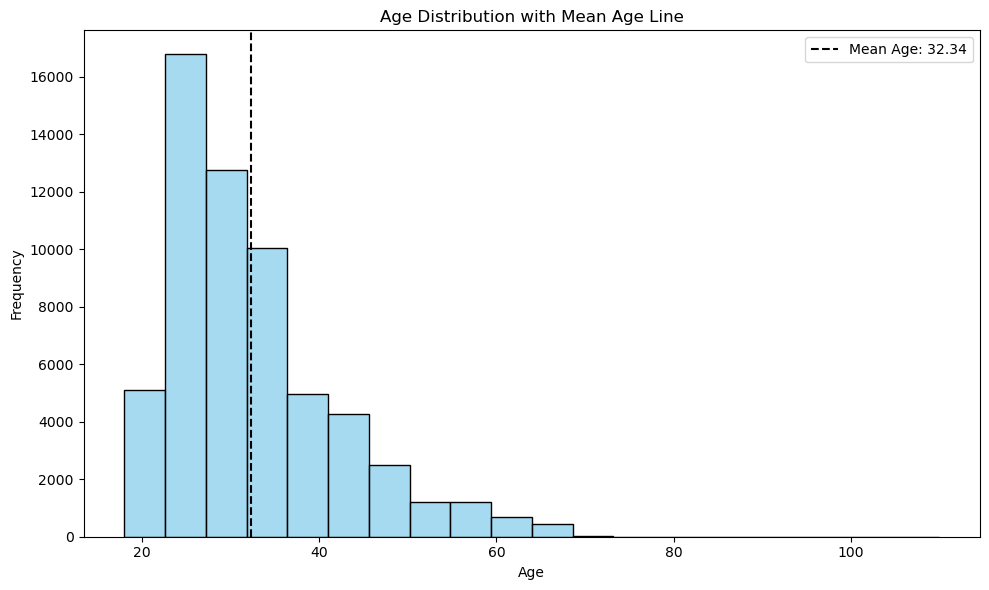

In [1340]:
# Calculating the mean age using mean() function and plotting a histogram of age
mean_age = data['age'].mean()
print("\nMean Age is:\n", mean_age.round(2))
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.axvline(mean_age, color='black', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.title("Age Distribution with Mean Age Line")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

##### Key Findings: The mean age users is 32.35 whereas the maximum number of users are of age 25. 

#### Question 1.2: How does the age distribution differ by gender? Are there age groups where one gender is more prevalent?

C:\Users\91810\AppData\Local\Temp\ipykernel_13228\1633990241.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution_by_gender = data.groupby(['gender', 'age_group'])['age_group'].value_counts().unstack(level=0, fill_value=0)


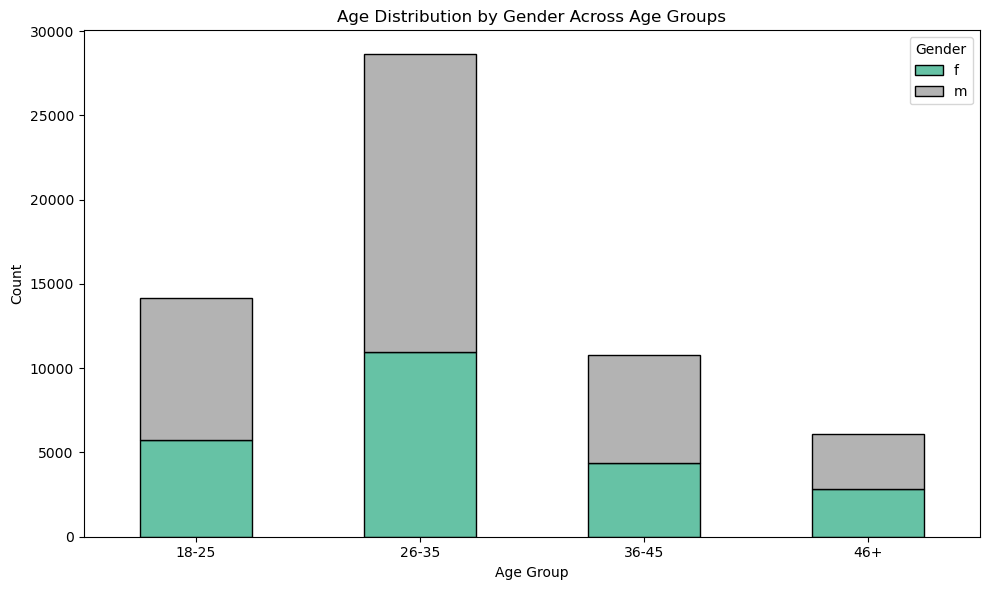

In [907]:
# counting age distribution by gender across age groups and plotting a stacked bar graph to show this relation
age_distribution_by_gender = data.groupby(['gender', 'age_group'])['age_group'].value_counts().unstack(level=0, fill_value=0)
age_distribution_by_gender.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='Set2', edgecolor='black')
plt.title('Age Distribution by Gender Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

##### Key Findings: Age group '26-35' have maximum user counts in which female are more prevalent.

### 2. Income and Age

Visualizing the relationship between income and age helps uncover patterns in reported income levels across age groups, which could inform user segmentation strategies.

#### Question 2.1: Use a scatterplot to visualize the relationship between income and age, with a trend line indicating overall patterns. Are older users more likely to report higher incomes?

C:\Users\91810\AppData\Local\Temp\ipykernel_13228\556546336.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=filtered_data, x='age', y='income', palette='Set2', alpha=0.6,)


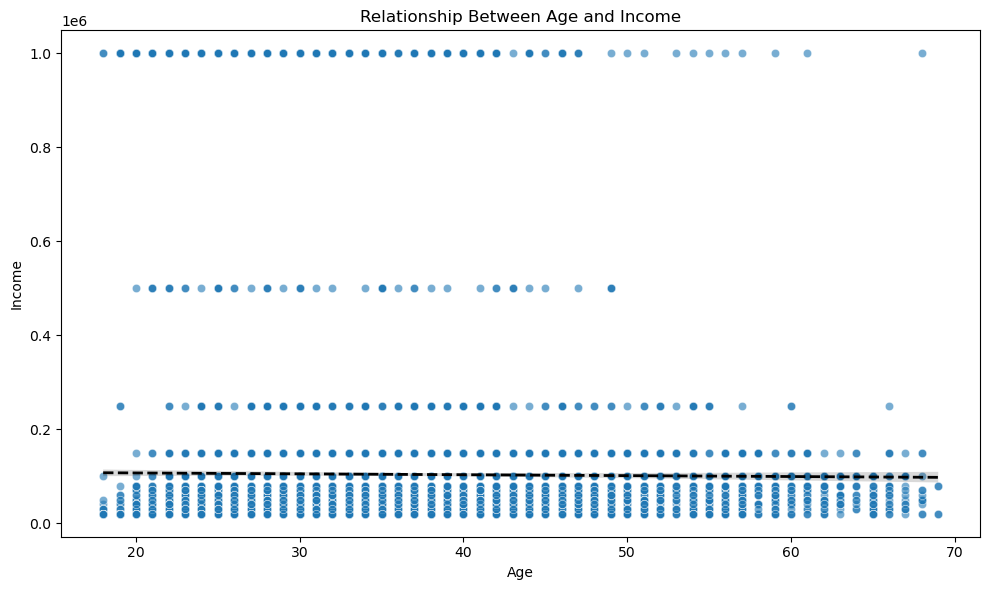

In [1348]:
# filtering income more than 0 and plotting a scatterplot to show relationship between age and income
filtered_data = data[data['income'] > 0]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='age', y='income', palette='Set2', alpha=0.6,)
sns.regplot(data=filtered_data, x='age',y='income', scatter=False, color='black', line_kws={'linewidth': 2, 'linestyle': 'dashed'},)
plt.title('Relationship Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

##### Key Findings: The density of users from all age groups is maximum for low and medium income groups.

#### Question 2.2: Create boxplots of income grouped by age_group. Which age group reports the highest median income?

C:\Users\91810\AppData\Local\Temp\ipykernel_13228\3147452336.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age_group = filtered_data.groupby('age_group')['income'].median()
C:\Users\91810\AppData\Local\Temp\ipykernel_13228\3147452336.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='age_group', y='income', palette='Set2', showfliers = False)


Income by Age Group:
 age_group
18-25    20000.0
26-35    50000.0
36-45    80000.0
46+      80000.0
Name: income, dtype: float64


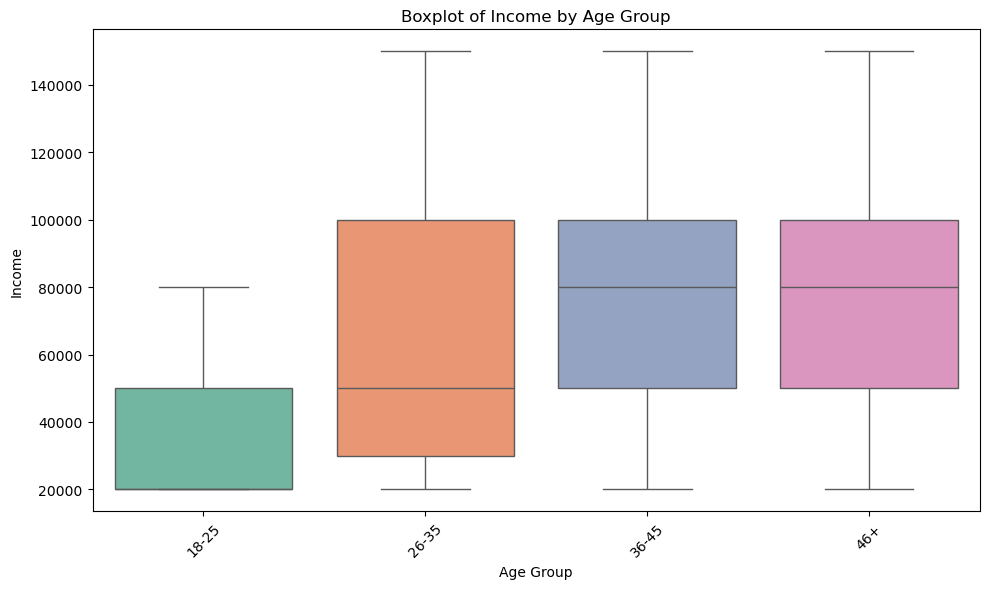

In [965]:
# filtering the income more than 0 and plotting a boxplot for income and age group
filtered_data = data[data['income'] > 0]
income_by_age_group = filtered_data.groupby('age_group')['income'].median()
print("Income by Age Group:\n", income_by_age_group)
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='age_group', y='income', palette='Set2', showfliers = False)
plt.title('Boxplot of Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Key Findings: Age group 36-45 and 46+ shows the maximum median income as 80000.

#### Question 2.3: Analyze income levels within gender and status categories. For example, are single men more likely to report higher incomes than single women?

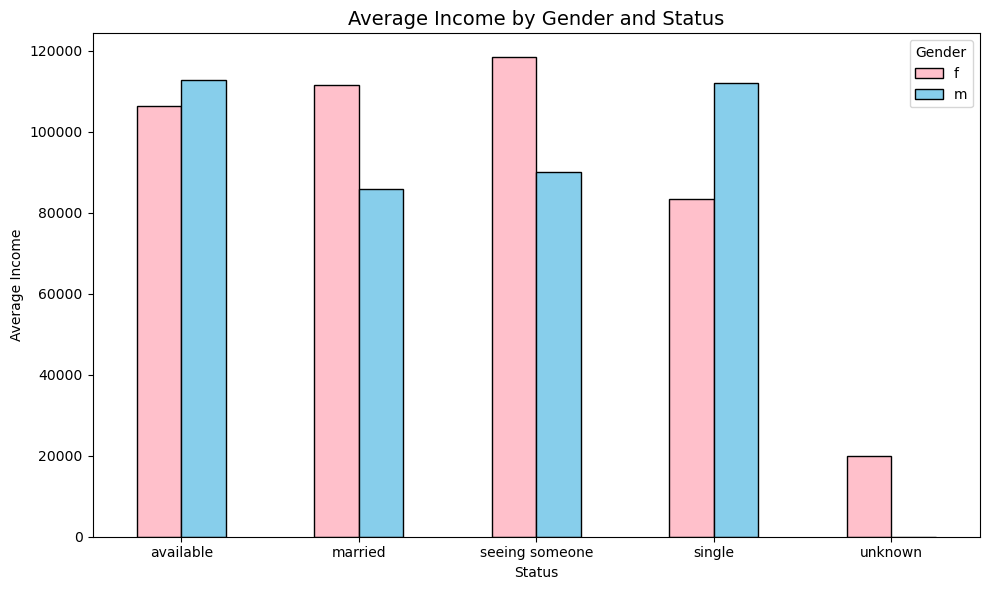

In [954]:
# filtering income more than 0 and plotting a bar graph for income by gender and status categories.
filtered_data = data[data['income'] > 0]
income_by_gender_status = filtered_data.groupby(['gender', 'status'])['income'].mean().reset_index()
pivot_data = income_by_gender_status.pivot(index='status', columns='gender', values='income')
pivot_data.plot(kind='bar', figsize=(10, 6), color=['pink', 'skyblue'], edgecolor='black')
plt.title('Average Income by Gender and Status', fontsize=14)
plt.ylabel('Average Income')
plt.xlabel('Status')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

##### Key Findings: Male with status as 'single' and 'available' reports highest average income, wheareas females with status 'seeing someone' reports highest average income.

## 3. Pets and Preferences

Pets are often a key lifestyle preference and compatibility factor. Analyzing how pets preferences distribute across demographics can provide insights for filters or recommendations.

#### Question 3.1: Create a bar chart showing the distribution of pets categories (e.g., likes dogs, likes cats). Which preferences are most common?

Pets Distribution:
 pets
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64


C:\Users\91810\AppData\Local\Temp\ipykernel_13228\2252467699.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pets_distribution.index, y = pets_distribution.values, palette='Set2')


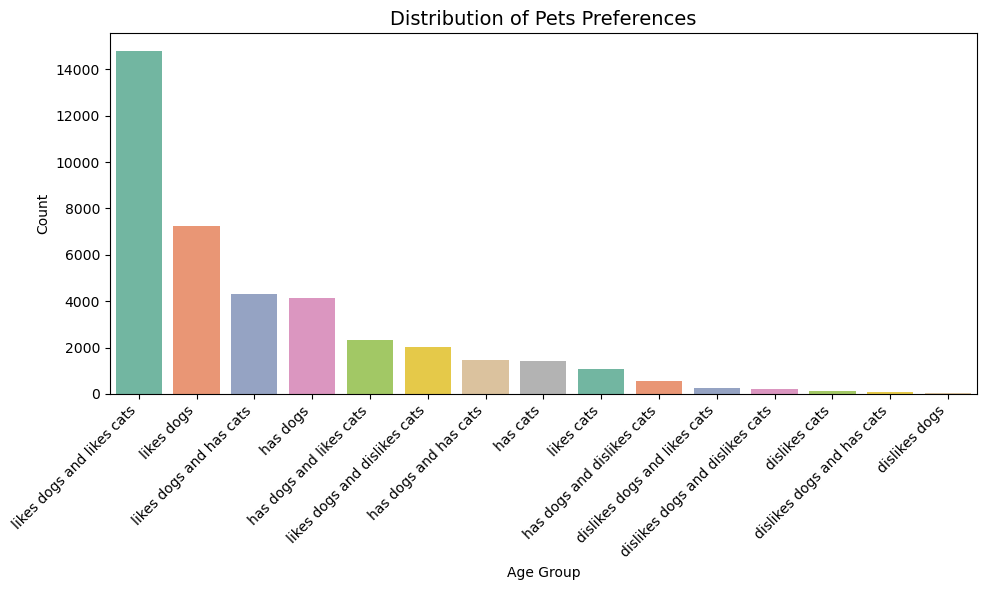

In [1041]:
# counting pet preference for each category of preference and ploting a bar graph to show this
pets_distribution = data['pets'].value_counts()
print("Pets Distribution:\n", pets_distribution) 
plt.figure(figsize=(10, 6))
sns.barplot(x = pets_distribution.index, y = pets_distribution.values, palette='Set2')
plt.title('Distribution of Pets Preferences', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Key Findings: Maximum number of users 'like dogs and cats' and 'likes dog' whereas least number of users 'dislike dogs'.

#### Question 3.2: How do pets preferences vary across gender and age_group? Are younger users more likely to report liking pets compared to older users?

C:\Users\91810\AppData\Local\Temp\ipykernel_13228\975044688.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pets_preference_by_age_group = data.groupby(['age_group'])['pets'].value_counts().unstack(level=0, fill_value=0)


age_group                        18-25  26-35  36-45   46+
pets                                                      
dislikes cats                       20     67     23    11
dislikes dogs                       12     22      9     1
dislikes dogs and dislikes cats     50     89     36    20
dislikes dogs and has cats          25     31     17     7
dislikes dogs and likes cats        63    115     40    20
has cats                           214    575    331   281
has dogs                           935   1787    814   572
has dogs and dislikes cats         181    241     82    40
has dogs and has cats              491    452    246   263
has dogs and likes cats            709    939    385   274
likes cats                         236    516    191   114
likes dogs                        1457   3989   1246   518
likes dogs and dislikes cats       531   1087    268   135
likes dogs and has cats            801   1805   1067   621
likes dogs and likes cats         3525   7194   2619  14

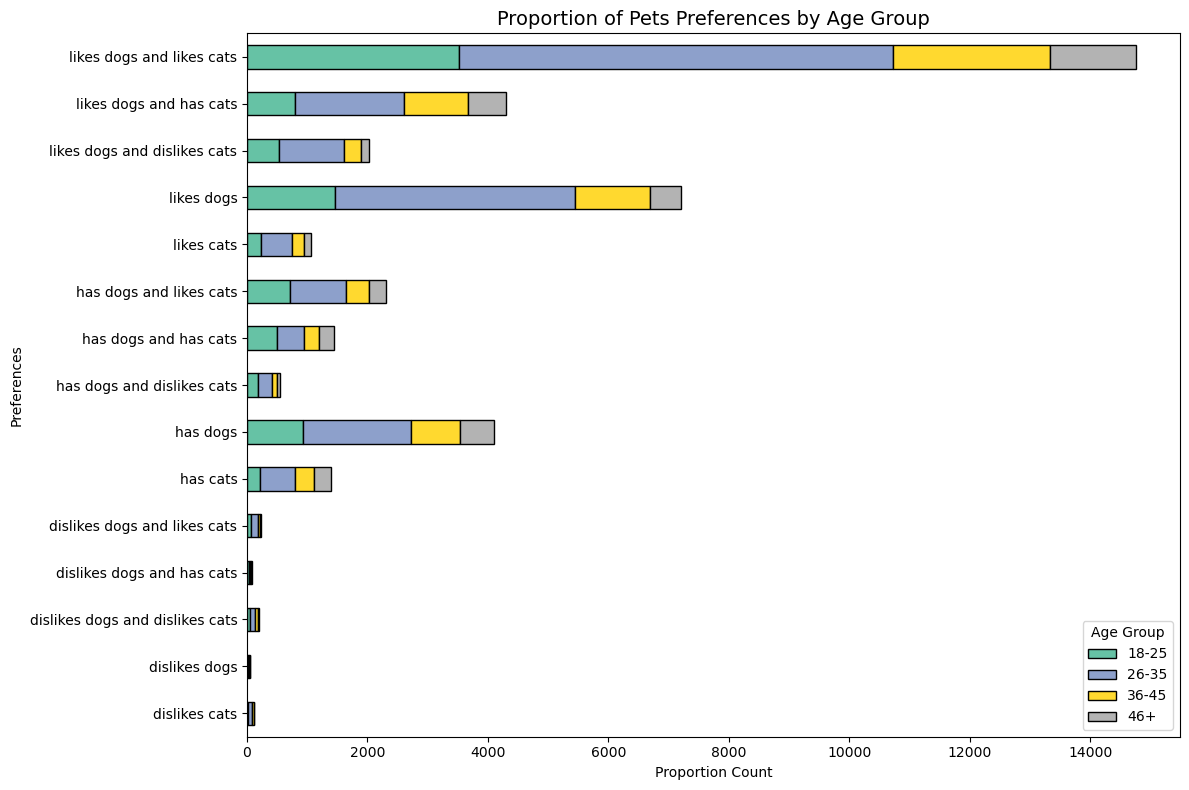

In [1051]:
# calculating pet preference across gender and plotting horizontal bar graph
pets_preference_by_age_group = data.groupby(['age_group'])['pets'].value_counts().unstack(level=0, fill_value=0)
print(pets_preference_by_age_group)
pets_preference_by_age_group.plot(kind='barh', figsize=(12, 8), stacked=True, colormap='Set2', edgecolor='black')
plt.title('Proportion of Pets Preferences by Age Group', fontsize=14)
plt.xlabel('Proportion Count')
plt.ylabel('Preferences')
plt.legend(title='Age Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Key Findings: In all age groups maximum users fall in category of pet preference as 'like dogs and like cats'.

gender                              f     m
pets                                       
dislikes cats                      58    64
dislikes dogs                      22    22
dislikes dogs and dislikes cats    95   101
dislikes dogs and has cats         32    49
dislikes dogs and likes cats       75   165
has cats                          795   611
has dogs                         1967  2167
has dogs and dislikes cats        314   238
has dogs and has cats             897   577
has dogs and likes cats          1150  1183
likes cats                        347   716
likes dogs                       2700  4524
likes dogs and dislikes cats      918  1111
likes dogs and has cats          2585  1728
likes dogs and likes cats        5264  9550


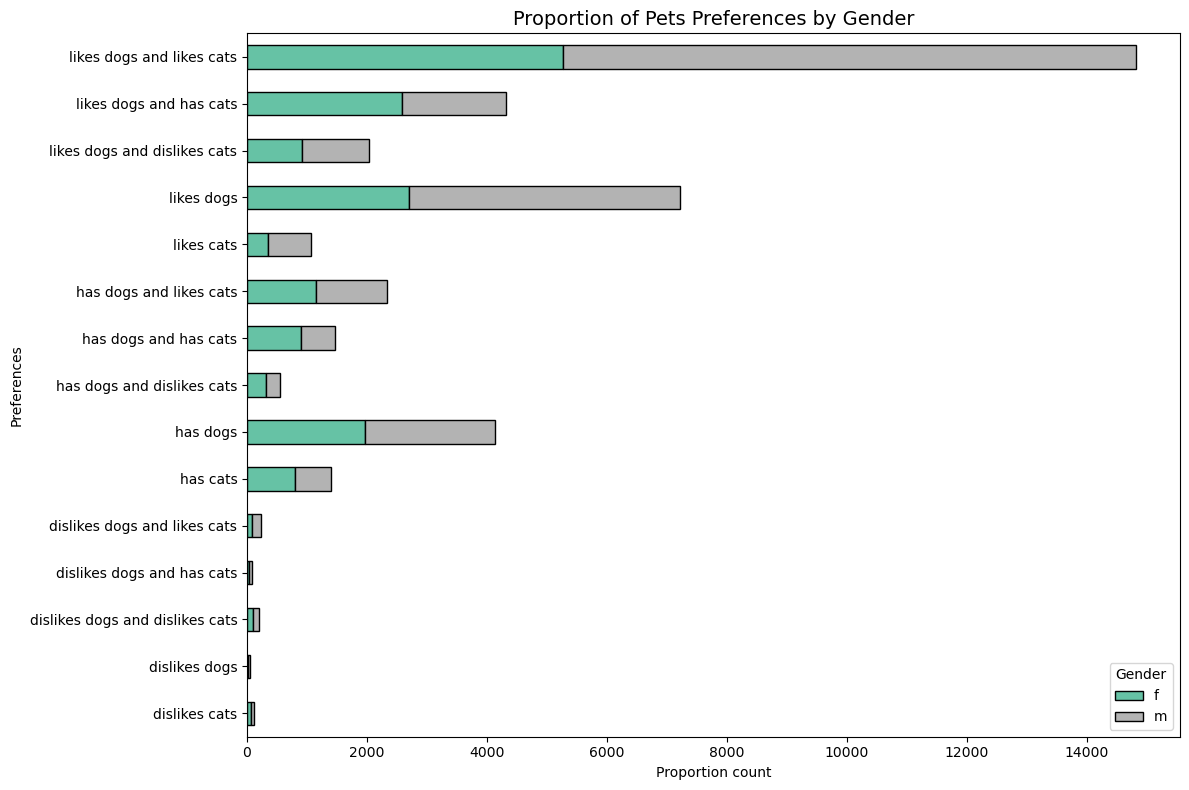

In [1049]:
# calulating pet preference across gender and plottinf a horizontal bar graph
pets_preference_by_gender = data.groupby(['gender'])['pets'].value_counts().unstack(level=0, fill_value=0)
print(pets_preference_by_gender)
pets_preference_by_gender.plot(kind='barh', figsize=(12, 8), stacked=True, colormap='Set2', edgecolor='black')
plt.title('Proportion of Pets Preferences by Gender', fontsize=14)
plt.xlabel('Proportion count')
plt.ylabel('Preferences')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Key Findings: Both male and female users are highest for pet preference as 'like dogs and like cats'. Out of which male are more prevalent.

### 4. Signs and Personality

Users’ self-reported zodiac signs (sign) can offer insights into personality preferences or trends. While not scientifically grounded, analyzing this data helps explore fun and engaging patterns.

#### Question 4.1: Create a pie chart showing the distribution of zodiac signs (sign) across the platform. Which signs are most and least represented? Is this the right chart? If not, replace with right chart.

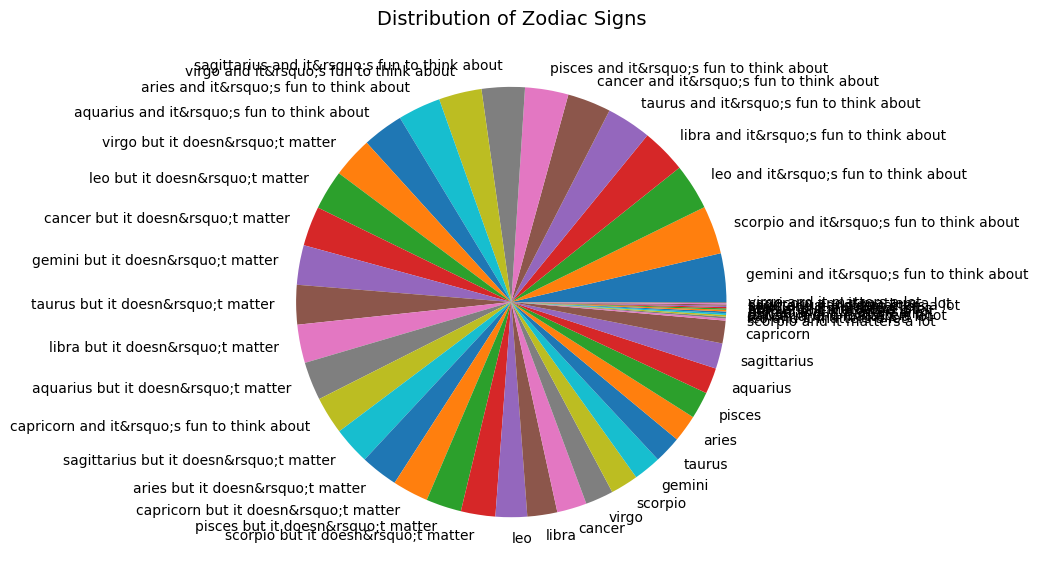

In [1098]:
# calculating values of zodiac signs and plotting a pie chart.
sign_counts = data['sign'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(sign_counts.values, labels=sign_counts.index)
plt.title('Distribution of Zodiac Signs', fontsize=14)
plt.tight_layout()
plt.show()

##### Key Findings: As the number of categories in zodianc signs are high, pie chart is not a right chart to visualize this.

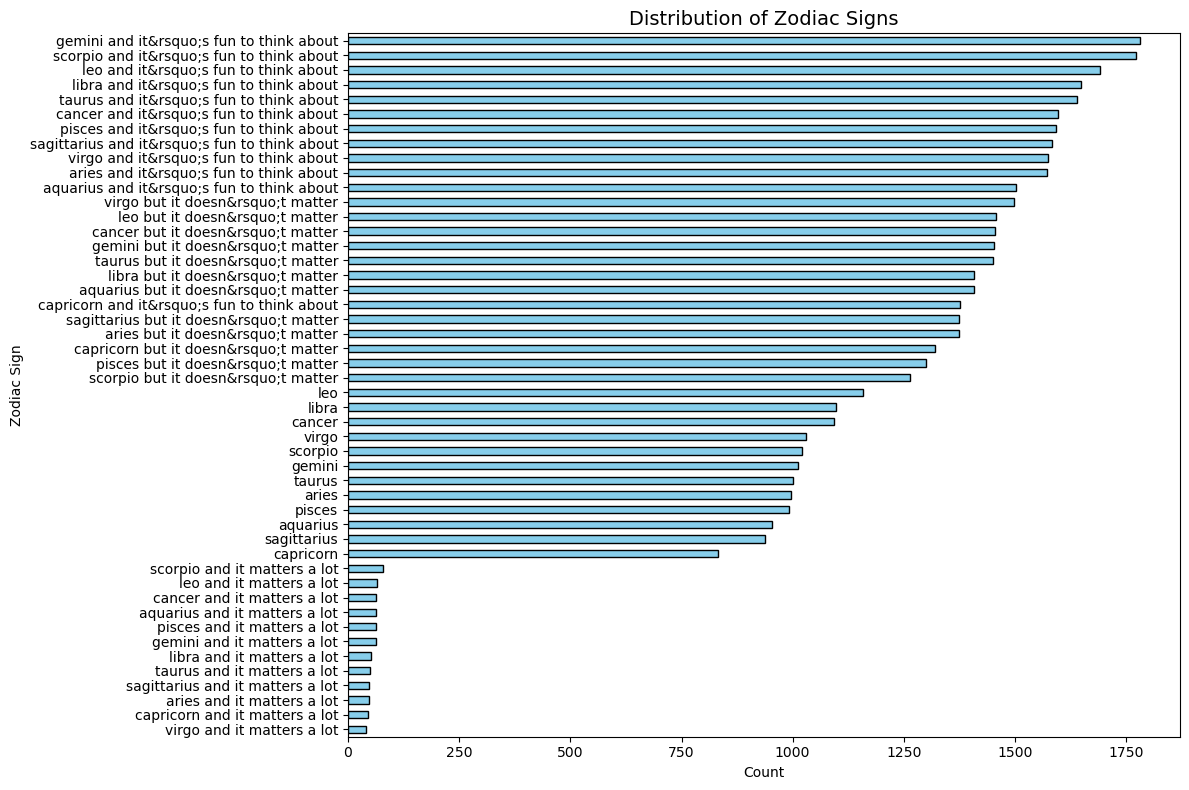

In [1104]:
# calculating values of zodiac signs and plotting a horizontal bar graph
sign_counts = data['sign'].value_counts().sort_values(ascending = True)
sign_counts.plot(kind='barh', figsize=(12, 8), color='skyblue', edgecolor='black')
plt.title('Distribution of Zodiac Signs', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Zodiac Sign')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Key Findings: Maximum number of users falls in sign category of 'gemini and its fun to think about' followed by 'scorpio and its to think about'.

#### Question 4.2: How does sign vary across gender and status? Are there noticeable patterns or imbalances?

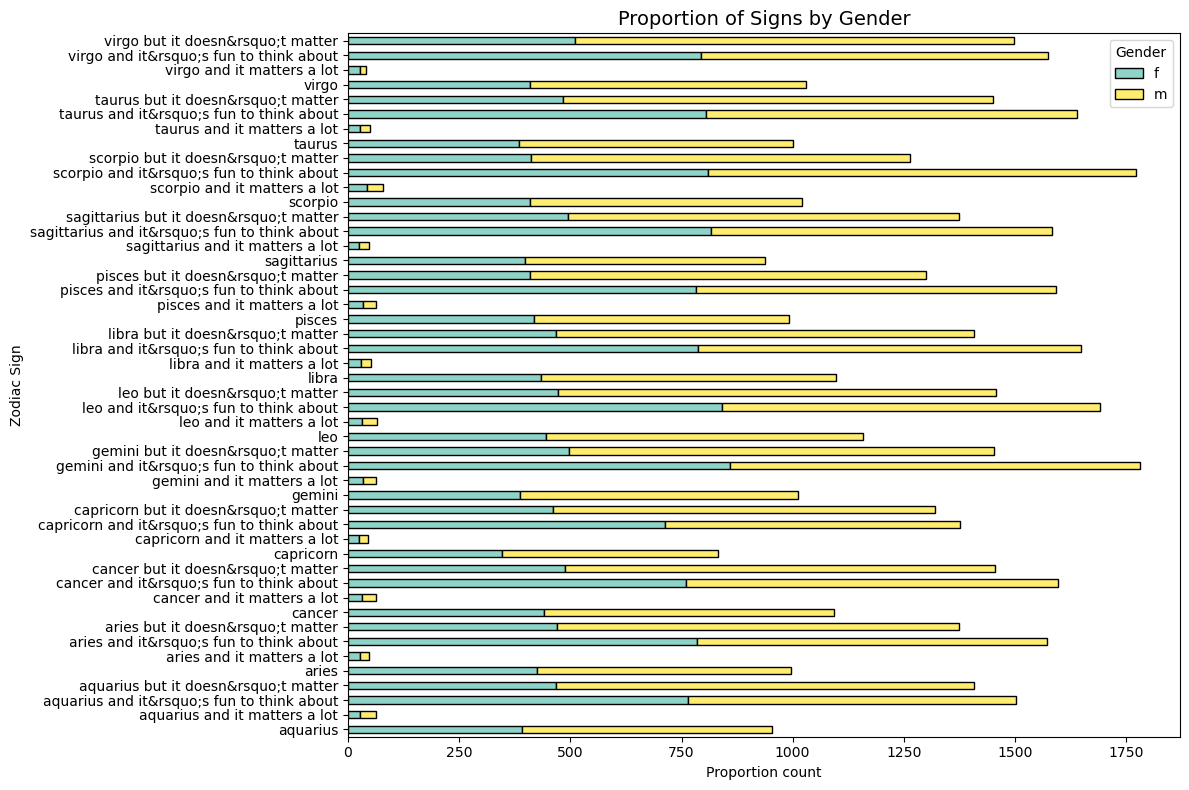

In [1421]:
# calculating zodiac sign counts by gender and plotting stacked horizontal bar graph
sign_count_by_gender = data.groupby(['gender'])['sign'].value_counts().unstack(level=0, fill_value=0)
sign_count_by_gender.plot(kind='barh', figsize=(12, 8), stacked=True, colormap='Set3', edgecolor='black')
plt.title('Proportion of Signs by Gender', fontsize=14)
plt.xlabel('Proportion count')
plt.ylabel('Zodiac Sign')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Key Findings: Maximum number of male and female users falls in sign category of 'gemini and its fun to think about' followed by 'scorpio and its to think about

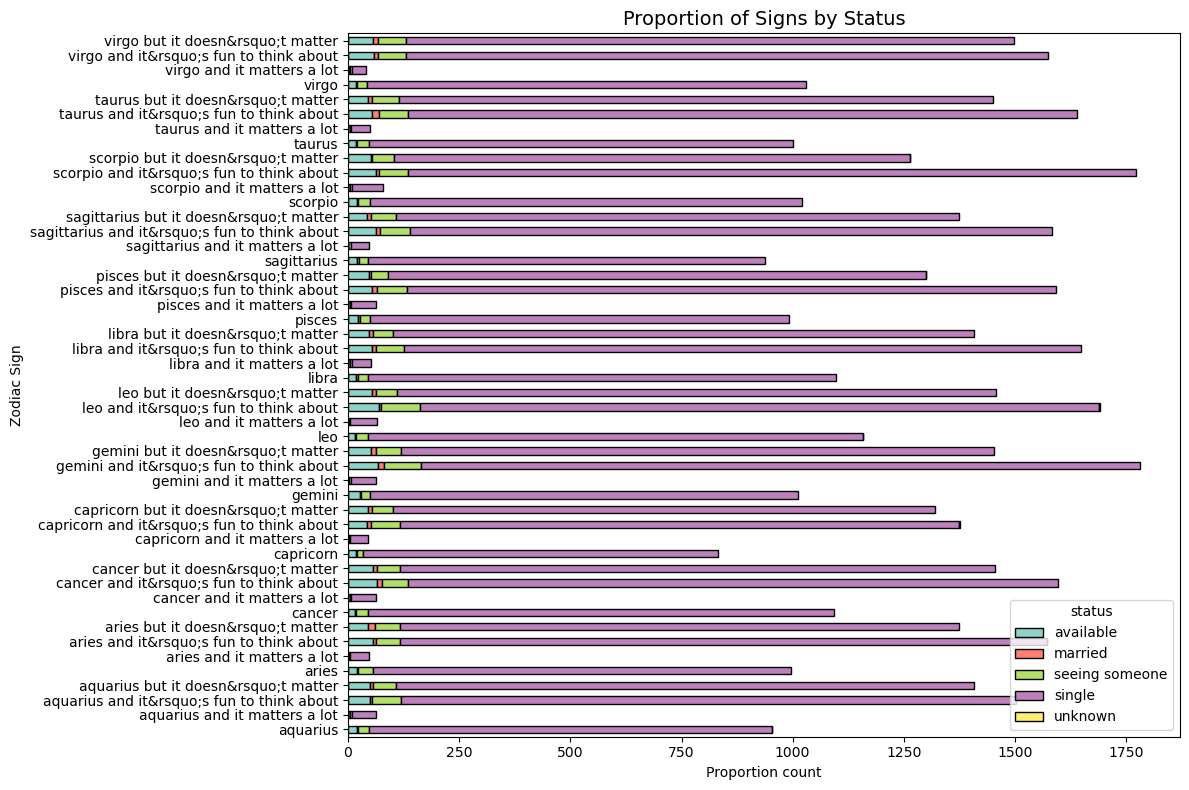

In [1419]:
# calculating zodiac sign counts by status and plotting stacked horizontal bar graph
sign_count_by_status = data.groupby(['status'])['sign'].value_counts().unstack(level=0, fill_value=0)
sign_count_by_status.plot(kind='barh', figsize=(12, 8), stacked=True, colormap='Set3', edgecolor='black')
plt.title('Proportion of Signs by Status', fontsize=14)
plt.xlabel('Proportion count')
plt.ylabel('Zodiac Sign')
plt.legend(title='status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Key Findings: Maximum number of users with different status falls in zodiac sign category of 'gemini and its fun to think about' followed by 'scorpio and its to think about'.

## Recommendations:
#### 1.	Age group 26-35 and 18-25 have maximum user hence they can be retained by giving offers on subscription.

#### 2.	Maximum users are from low income group, preferred matches should be from low income to enhance chances of match.


#### 3.	Male have less profile completeness so they should be notified frequently to complete their profile for better reach.

#### 4.	Male (59.77%) users are more than the female (40.23%) hence they can be retained by providing long term budget subscriptions.


#### 5.	Both men (93.16%) and women (92.54%) predominantly identify as single. Enhance features and content targeted at single users, such as matchmaking algorithms, icebreaker prompts, and events for singles.

#### 6.	Vegan are very less hence similar matches to be provided through algorithms. Maximum users have Mostly anything (46.65%) diet preference hence they can be provided matches from all diet preferences.


#### 7.	Since in all diet preference category maximum users drinks socially hence no need to further analyse.

#### 8.	Focus marketing and engagement efforts in cities like San Francisco (31064), Oakland (7214), Berkeley (4212) and States like California (59855) to strengthen user retention and grow the platform further in these areas.


#### 9.	Users with age group 26-35 have maximum average height, hence introduce features or content emphasizing fitness, sports, or outdoor activities to engage this demographic. Highlight height compatibility in matchmaking algorithms to enhance user satisfaction.

#### 10.	Users identifying as athletic (average height: 177.06) and curvy (average height: 165.63) exhibit significant differences in average height. Incorporate height and body type preferences in matchmaking algorithms to enhance user compatibility. Highlight fitness-related features or events to engage users in these categories.


#### 11.	High Income group, with an average income of 184,925.78, represents a lucrative segment. Offer premium subscription plans and exclusive features tailored to this group to maximize revenue.

#### 12.	In all age groups average income of male is more than that of female. Focus on personalized campaigns and professional networking features to attract and retain women in this age group. The maximum average income for both male and female is from 26-35 age group. Design premium offerings and exclusive events targeting this high-earning demographic to maximize revenue. 


#### 13.	Focus on Young Adults (Age 25) which represents the largest active demographic. Tailor features, promotions, and events that resonate with young adults, such as social meetups, casual dating options, or career networking tools. Expand Engagement for 30+ Users: Introduce age-specific features such as serious relationship matchmaking, parenting forums, or professional networking to engage this demographic.

#### 14.	Age group '26-35' have maximum user counts in which females are more prevalent. Launch campaigns and features that resonate with women's interests, such as community-building events or wellness-focused content.


#### 15.	Male with status as 'single' and 'available' reports highest average income, whereas females with status 'seeing someone' reports highest average income. Offer features like upscale experiences or premium memberships that align with their lifestyle and interests. Bridge Income Gaps Across Genders.

#### 16.	Maximum number of users 'like dogs and cats' and 'likes dog' whereas least number of users 'dislike dogs. Focus pet lovers: Introduce features like pet-friendly event suggestions, pet-lover communities, or profile badges for users with pets to enhance engagement.


### Thank You